In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

In [2]:
import numpy as np
import pandas as pd

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Allow for full tables to be shown
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
data = pd.read_csv("data/epl-passing.csv")
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,TotalCmp,TotalAtt,...,LongAtt,LongCmp%,Ast,xA,A-xA,KP,FinalThird,PPA,CrsPA,Prog
0,1,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,32-240,1989,11.5,12.5,17.7,...,1.22,57.1,0.09,0.07,0.02,0.78,0.35,0.87,0.09,1.13
1,2,Folarin Balogun,eng ENG,FW,Arsenal,20-225,2001,0.8,5.0,10.0,...,1.25,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,Reiss Nelson,eng ENG,FW,Arsenal,22-065,1999,0.2,50.0,55.0,...,0.00,NaN,0.00,0.00,0.00,5.00,5.00,0.00,0.00,5.00
3,4,Alexandre Lacazette,fr FRA,FWMF,Arsenal,30-261,1991,11.5,19.4,25.9,...,2.35,66.7,0.35,0.10,0.24,1.30,1.65,1.30,0.09,2.52
4,5,Martinelli,br BRA,FWMF,Arsenal,20-240,2001,10.4,18.4,26.7,...,4.62,43.8,0.19,0.10,0.10,1.54,0.29,0.67,0.29,0.96


In [9]:
data['FinalThirdPer90'] = data['FinalThird'] / data ['90s']

In [10]:
cols_1 = ['Player', 'Pos', 'Squad', '90s', 'TotalCmp%', 'FinalThird', 'FinalThirdPer90']
data[cols_1].head()

,Player,Pos,Squad,90s,TotalCmp%,FinalThird,FinalThirdPer90
0,Pierre-Emerick Aubameyang,FW,Arsenal,11.5,70.6,0.35,0.030435
1,Folarin Balogun,FW,Arsenal,0.8,50.0,0.00,0.000000
2,Reiss Nelson,FW,Arsenal,0.2,90.9,5.00,25.000000
3,Alexandre Lacazette,FWMF,Arsenal,11.5,74.8,1.65,0.143478
4,Martinelli,FWMF,Arsenal,10.4,68.7,0.29,0.027885


In [17]:
cbs_list = [
    'Virgil van Dijk', 'Thiago Silva', 'Aymeric Laporte', 'Rúben Dias', 'Antonio Rüdiger', 'Raphaël Varane',
    'James Tarkowski', 'Tyrone Mings', 'John Stones', 'Ibrahima Konaté', 'Andreas Christensen', 'Trevoh Chalobah', 'Malang Sarr', 
    'Mason Holgate', 'Angelo Ogbonna', 'Harry Maguire', 'Ben Mee', 'Joël Matip', 'Kurt Zouma', 'Jonny Evans', 'Gabriel Dos Santos', 
    'Cristian Romero', 'Joe Gomez', 'Ben White', 'Nathan Aké', 'Eric Dier', 'Conor Coady', 'Victor Lindelöf', 'Ezri Konsa', 'Ben Godfrey', 
    'Jannik Vestergaard', 'Mohammed Salisu', 'Eric Bailly', 'Kristoffer Ajer', 'Yerry Mina', 'Rob Holding', 'Michael Keane', 'Jamaal Lascelles', 
    'Kortney Hause', 'Jan Bednarek', 'Joachim Andersen', 'Lewis Dunk', 'Grant Hanley', 'Phil Jones', 'Craig Dawson', 'Pontus Jansson', 
    'Liam Cooper', 'Craig Cathcart', 'Federico Fernández', 'Ethan Pinnock', 'Çağlar Söyüncü', 'Issa Diop', 'Pascal Struijk', 'Marc Guéhi', 'Max Kilman', 
    'Joe Rodon', 'Japhet Tanganga', 'Romain Saïss', 'Daniel Amartey', 'Ciaran Clark', 'Diego Llorente', 'Robin Koch', 'Davinson Sánchez', 'Dan Burn'
    # 'Cesar Azpilicueta', 'Wesley Fofana', 'Willy Boly'
]
print('Total CBs in the PL 2021-22 season so far:', len(cbs_list))

Total CBs in the PL 2021-22 season so far: 64


In [11]:
filtered_df = data[(data['Player'].isin(cbs_list)) & (data['90s'] >= 2.5)][cols_1]
print(filtered_df.shape)

Total CBs in the PL 2021-22 season so far: 63
(58, 7)


In [12]:
filtered_df

,Player,Pos,Squad,90s,TotalCmp%,FinalThird,FinalThirdPer90
16,Gabriel Dos Santos,DF,Arsenal,18.4,89.0,2.45,0.133152
17,Rob Holding,DF,Arsenal,4.8,86.6,0.63,0.131250
24,Ben White,DF,Arsenal,20.0,85.0,3.35,0.167500
49,Kortney Hause,DF,Aston Villa,4.4,78.6,1.82,0.413636
50,Ezri Konsa,DF,Aston Villa,20.0,85.6,0.95,0.047500
51,Tyrone Mings,DF,Aston Villa,19.4,79.2,2.63,0.135567
68,Kristoffer Ajer,DF,Brentford,11.3,67.3,1.77,0.156637
73,Pontus Jansson,DF,Brentford,24.9,82.0,0.92,0.036948
75,Ethan Pinnock,DF,Brentford,22.7,75.8,2.29,0.100881
98,Dan Burn,DF,Brighton,11.4,81.6,3.68,0.322807


In [13]:
filtered_df.iplot(
    kind='scatter', x='TotalCmp%', y='FinalThirdPer90',
    mode='markers', size=10, text='Player',
    xTitle='Pass Completion %', yTitle='Passes into final 1/3',
    title='Pass Completion vs Passes into final third'
)

# fig = go.Figure(data=go.Scatter(x=filtered_df['TotalCmp%'], y=filtered_df['FinalThirdPer90'], mode='markers'))
# fig.show()

In [ ]:
# data = [go.Bar(x=e4_plot.query_day, y=e4_plot.queries_count)]
# py.iplot(data)

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# fig.show()

# fig = ff.create_distplot([e20_inner_df["count_bookings"].tolist()], ['bookings'], bin_size=25)
# fig.show()

Font Family: Rubik - https://fonts.google.com/specimen/Rubik
font-family: 'Rubik', sans-serif;

Background Colour: #1d2849
Text Colour: White
Plot Colours: #00a7e7, #96b4c8, #329682

    use the mplsoccer library using a vertical pitch and pitch colour: #263152

In [5]:
data = pd.read_csv("data/epl-sca-gca.csv")
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def
0,1,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23-138,1998,21.7,109,5.02,62,39,4,3,1,0,14,0.65,9,5,0,0,0,0
1,2,James Ward-Prowse,eng ENG,MF,Southampton,27-113,1994,22.7,66,2.90,36,27,0,1,0,2,5,0.22,3,2,0,0,0,0
2,3,Son Heung-min,kr KOR,FWMF,Tottenham,29-229,1992,19.4,69,3.56,38,22,1,4,3,1,8,0.41,4,2,0,0,2,0
3,4,Matt Ritchie,sct SCO,DF,Newcastle Utd,32-165,1989,14.6,40,2.73,18,21,0,1,0,0,3,0.20,2,1,0,0,0,0
4,5,Raphael Dias Belloli,br BRA,MFFW,Leeds United,25-070,1996,20.0,82,4.11,42,19,8,8,4,1,5,0.25,3,0,1,0,1,0


In [6]:
data['Nation'] = data['Nation'].str.split(' ', expand=True)[1]
data['Pos'] = data['Pos'].str[:2]

In [7]:
data

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def
0,1,Trent Alexander-Arnold,ENG,DF,Liverpool,23-138,1998,21.7,109,5.02,62,39,4,3,1,0,14,0.65,9,5,0,0,0,0
1,2,James Ward-Prowse,ENG,MF,Southampton,27-113,1994,22.7,66,2.90,36,27,0,1,0,2,5,0.22,3,2,0,0,0,0
2,3,Son Heung-min,KOR,FW,Tottenham,29-229,1992,19.4,69,3.56,38,22,1,4,3,1,8,0.41,4,2,0,0,2,0
3,4,Matt Ritchie,SCO,DF,Newcastle Utd,32-165,1989,14.6,40,2.73,18,21,0,1,0,0,3,0.20,2,1,0,0,0,0
4,5,Raphael Dias Belloli,BRA,MF,Leeds United,25-070,1996,20.0,82,4.11,42,19,8,8,4,1,5,0.25,3,0,1,0,1,0
5,6,Luke Shaw,ENG,DF,Manchester Utd,26-225,1995,17.1,60,3.51,38,19,0,1,0,2,6,0.35,5,1,0,0,0,0
6,7,Pascal Groß,GER,MF,Brighton,30-252,1991,13.0,54,4.15,32,19,0,3,0,0,3,0.23,2,1,0,0,0,0
7,8,Billy Gilmour,SCO,MF,Norwich City,20-256,2001,14.0,38,2.71,16,19,1,2,0,0,1,0.07,0,1,0,0,0,0
8,9,Conor Gallagher,ENG,MF,Crystal Palace,22-016,2000,20.4,73,3.57,35,18,3,7,8,2,11,0.54,7,0,2,0,1,1
9,10,Kevin De Bruyne,BEL,MF,Manchester City,30-239,1991,14.2,76,5.36,52,17,3,2,2,0,5,0.35,2,1,1,0,1,0


In [29]:
filtered_df = data[(data['Player'].isin(cbs_list)) & (data['90s'] >= 5)]
print(filtered_df.shape)

Total CBs in the PL 2021-22 season so far: 63
(55, 24)


In [30]:
#Create list of columns to sum, then assign the sum to a new column
add_list = ['SCA_PassLive', 'SCA_PassDead', 'SCA_Drib', 'SCA_Sh', 'SCA_Fld', 'SCA_Def']
filtered_df['SCA_Sum'] = filtered_df[add_list].sum(axis=1)

In [31]:
filtered_df['SCA_Pass_Ratio'] = (filtered_df['SCA_PassLive']+filtered_df['SCA_PassDead'])/filtered_df['SCA_Sum']
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154


In [32]:
filtered_df['SCA_Drib_Ratio'] = filtered_df['SCA_Drib']/filtered_df['SCA_Sum']
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000


In [33]:
filtered_df['SCA_Sh_Ratio'] = filtered_df['SCA_Sh']/filtered_df['SCA_Sum']
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462,0.076923
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000,0.000000
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667,0.200000
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000,0.052632
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000,0.076923


In [34]:
filtered_df['SCA_Fld_Ratio'] = filtered_df['SCA_Fld']/filtered_df['SCA_Sum']
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462,0.076923,0.000000
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000,0.000000,0.000000
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667,0.200000,0.066667
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000,0.052632,0.000000
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000,0.076923,0.076923


In [35]:
filtered_df['SCA_Def_Ratio'] = filtered_df['SCA_Def']/filtered_df['SCA_Sum']
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462,0.076923,0.000000,0.038462
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000,0.000000,0.000000,0.076923
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667,0.200000,0.066667,0.066667
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000,0.052632,0.000000,0.105263
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000,0.076923,0.076923,0.000000


In [36]:
filtered_df = filtered_df.replace(np.nan, 0)

In [72]:
new_cols_list = ['SCA90', 'SCA_Pass_Ratio', 'SCA_Drib_Ratio', 'SCA_Sh_Ratio', 'SCA_Fld_Ratio', 'SCA_Def_Ratio']
km = KMeans(n_clusters=4, init='random', random_state=0)
y_km = km.fit_predict(filtered_df[new_cols_list])
y_km

array([1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3,
       0, 3, 0, 3, 3, 1, 3, 3, 3, 2, 0, 0, 3, 3, 1, 3, 2, 0, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2], dtype=int32)

In [73]:
filtered_df['Cluster'] = y_km
filtered_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio,Cluster
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462,0.076923,0.000000,0.038462,1
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000,0.000000,0.000000,0.076923,0
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667,0.200000,0.066667,0.066667,0
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000,0.052632,0.000000,0.105263,1
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000,0.076923,0.076923,0.000000,1


In [74]:
filtered_df[filtered_df['Cluster'] == 0].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio,Cluster
97,98,Jan Bednarek,POL,DF,Southampton,25-316,1996,18.2,13,0.71,10,2,0,0,0,1,0,0.00,0,0,0,0,0,0,13,0.923077,0.000000,0.000000,0.000000,0.076923,0
99,100,Harry Maguire,ENG,DF,Manchester Utd,28-354,1993,20.7,15,0.72,7,2,1,3,1,1,1,0.05,1,0,0,0,0,0,15,0.600000,0.066667,0.200000,0.066667,0.066667,0
261,262,Ethan Pinnock,JAM,DF,Brentford,28-269,1993,23.7,15,0.63,13,0,0,2,0,0,2,0.08,1,0,0,1,0,0,15,0.866667,0.000000,0.133333,0.000000,0.000000,0
266,267,Ben White,ENG,DF,Arsenal,24-137,1997,21.0,17,0.81,12,0,0,3,1,1,1,0.05,1,0,0,0,0,0,17,0.705882,0.000000,0.176471,0.058824,0.058824,0
267,268,Tyrone Mings,ENG,DF,Aston Villa,28-346,1993,21.4,16,0.75,12,0,0,3,1,0,2,0.09,1,0,0,1,0,0,16,0.750000,0.000000,0.187500,0.062500,0.000000,0


In [75]:
filtered_df[filtered_df['Cluster'] == 1].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio,Cluster
89,90,Ben Godfrey,ENG,DF,Everton,24-038,1998,16.5,26,1.57,20,2,1,2,0,1,2,0.12,1,0,0,1,0,0,26,0.846154,0.038462,0.076923,0.000000,0.038462,1
133,134,Joachim Andersen,DEN,DF,Crystal Palace,25-267,1996,19.4,19,0.98,15,1,0,1,0,2,3,0.15,2,0,0,1,0,0,19,0.842105,0.000000,0.052632,0.000000,0.105263,1
140,141,Kristoffer Ajer,NOR,DF,Brentford,23-311,1998,12.3,13,1.06,10,1,0,1,1,0,2,0.16,1,0,0,0,1,0,13,0.846154,0.000000,0.076923,0.076923,0.000000,1
206,207,Antonio Rüdiger,GER,DF,Chelsea,28-356,1993,24.0,30,1.25,25,0,1,2,2,0,7,0.29,4,0,0,1,2,0,30,0.833333,0.033333,0.066667,0.066667,0.000000,1
213,214,Rúben Dias,POR,DF,Manchester City,24-284,1997,22.7,25,1.10,23,0,0,1,0,1,4,0.18,3,0,0,1,0,0,25,0.920000,0.000000,0.040000,0.000000,0.040000,1


In [76]:
filtered_df[filtered_df['Cluster'] == 2].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio,Cluster
329,330,Max Kilman,ENG,DF,Wolves,24-275,1997,24.0,7,0.29,5,0,1,1,0,0,1,0.04,0,0,0,1,0,0,7,0.714286,0.142857,0.142857,0.0,0.0,2
347,348,Craig Dawson,ENG,DF,West Ham,31-292,1990,19.9,7,0.35,4,0,1,2,0,0,2,0.10,2,0,0,0,0,0,7,0.571429,0.142857,0.285714,0.0,0.0,2
351,352,Pontus Jansson,SWE,DF,Brentford,31-009,1991,25.9,7,0.27,4,0,0,3,0,0,3,0.12,1,0,0,2,0,0,7,0.571429,0.000000,0.428571,0.0,0.0,2
371,372,Grant Hanley,SCO,DF,Norwich City,30-094,1991,20.2,6,0.30,3,0,0,3,0,0,0,0.00,0,0,0,0,0,0,6,0.500000,0.000000,0.500000,0.0,0.0,2
409,410,Japhet Tanganga,ENG,DF,Tottenham,22-328,1999,8.2,3,0.37,2,0,0,1,0,0,0,0.00,0,0,0,0,0,0,3,0.666667,0.000000,0.333333,0.0,0.0,2


In [77]:
filtered_df[filtered_df['Cluster'] == 3].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,SCA_PassLive,SCA_PassDead,SCA_Drib,SCA_Sh,SCA_Fld,SCA_Def,GCA,GCA90,GCA_PassLive,GCA_PassDead,GCA_Drib,GCA_Sh,GCA_Fld,GCA_Def,SCA_Sum,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio,Cluster
154,155,Jonny Evans,NIR,DF,Leicester City,34-050,1988,8.4,4,0.48,3,1,0,0,0,0,2,0.24,1,1,0,0,0,0,4,1.0,0.0,0.0,0.0,0.0,3
279,280,Marc Guéhi,ENG,DF,Crystal Palace,21-224,2000,24.0,11,0.46,11,0,0,0,0,0,0,0.00,0,0,0,0,0,0,11,1.0,0.0,0.0,0.0,0.0,3
293,294,Romain Saïss,MAR,DF,Wolves,31-333,1990,21.4,10,0.47,9,0,0,1,0,0,0,0.00,0,0,0,0,0,0,10,0.9,0.0,0.1,0.0,0.0,3
302,303,Victor Lindelöf,SWE,DF,Manchester Utd,27-220,1994,16.1,8,0.50,8,0,0,0,0,0,3,0.19,3,0,0,0,0,0,8,1.0,0.0,0.0,0.0,0.0,3
310,311,Çağlar Söyüncü,TUR,DF,Leicester City,25-275,1996,19.7,7,0.35,7,0,0,0,0,0,0,0.00,0,0,0,0,0,0,7,1.0,0.0,0.0,0.0,0.0,3


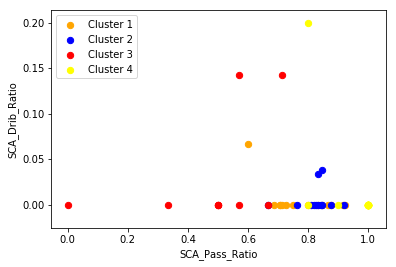

In [78]:
def plotClusters(xAxis, yAxis):
    plt.scatter(filtered_df[filtered_df['Cluster']==0][xAxis], filtered_df[filtered_df['Cluster']==0][yAxis], s=40, c='orange', label ='Cluster 1')
    plt.scatter(filtered_df[filtered_df['Cluster']==1][xAxis], filtered_df[filtered_df['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(filtered_df[filtered_df['Cluster']==2][xAxis], filtered_df[filtered_df['Cluster']==2][yAxis], s=40, c='red', label ='Cluster 3')
    plt.scatter(filtered_df[filtered_df['Cluster']==3][xAxis], filtered_df[filtered_df['Cluster']==3][yAxis], s=40, c='yellow', label ='Cluster 4')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 
    
plotClusters('SCA_Pass_Ratio', 'SCA_Drib_Ratio')

In [71]:
filtered_df[filtered_df['SCA_Drib_Ratio'] > 0.00][['Player', 'Squad', 'Age', 'Cluster'] + new_cols_list]

,Player,Squad,Age,Cluster,SCA90,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio
89,Ben Godfrey,Everton,24-038,1,1.57,0.846154,0.038462,0.076923,0.000000,0.038462
99,Harry Maguire,Manchester Utd,28-354,1,0.72,0.600000,0.066667,0.200000,0.066667,0.066667
206,Antonio Rüdiger,Chelsea,28-356,1,1.25,0.833333,0.033333,0.066667,0.066667,0.000000
329,Max Kilman,Wolves,24-275,2,0.29,0.714286,0.142857,0.142857,0.000000,0.000000
346,Andreas Christensen,Chelsea,25-318,0,0.41,0.800000,0.200000,0.000000,0.000000,0.000000
347,Craig Dawson,West Ham,31-292,2,0.35,0.571429,0.142857,0.285714,0.000000,0.000000


In [79]:
filtered_df[filtered_df['SCA_Pass_Ratio'] > 0.9][['Player', 'Squad', 'Age', 'Cluster'] + new_cols_list]

,Player,Squad,Age,Cluster,SCA90,SCA_Pass_Ratio,SCA_Drib_Ratio,SCA_Sh_Ratio,SCA_Fld_Ratio,SCA_Def_Ratio
97,Jan Bednarek,Southampton,25-316,0,0.71,0.923077,0.0,0.000000,0.0,0.076923
154,Jonny Evans,Leicester City,34-050,3,0.48,1.000000,0.0,0.000000,0.0,0.000000
213,Rúben Dias,Manchester City,24-284,1,1.10,0.920000,0.0,0.040000,0.0,0.040000
276,Davinson Sánchez,Tottenham,25-255,0,0.84,0.916667,0.0,0.083333,0.0,0.000000
279,Marc Guéhi,Crystal Palace,21-224,3,0.46,1.000000,0.0,0.000000,0.0,0.000000
302,Victor Lindelöf,Manchester Utd,27-220,3,0.50,1.000000,0.0,0.000000,0.0,0.000000
310,Çağlar Söyüncü,Leicester City,25-275,3,0.35,1.000000,0.0,0.000000,0.0,0.000000
311,Ezri Konsa,Aston Villa,24-122,3,0.35,1.000000,0.0,0.000000,0.0,0.000000
321,Lewis Dunk,Brighton,30-093,3,0.38,1.000000,0.0,0.000000,0.0,0.000000
322,Jamaal Lascelles,Newcastle Utd,28-103,3,0.34,1.000000,0.0,0.000000,0.0,0.000000


In [19]:
data = pd.read_csv("data/epl-possession.csv")
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries,Carries_TotDist,Carries_PrgDist,Carries_Prog,Carries_Final3rd,Carries_CPA,Carries_Mis,Carries_Dis,Rec_Targ,Rec,Rec%,Rec_Prog
0,1,Max Aarons,eng ENG,DF,Norwich City,22-052,2000,23.6,1331,118,518,555,353,22,1096,27,59,45.8,28,4,770,4531,2766,123,38,10,18,22,818,739,90.3,30
1,2,Che Adams,sct SCO,FW,Southampton,25-227,1996,14.4,476,23,74,210,215,62,466,7,17,41.2,9,0,300,1153,537,26,11,6,37,35,627,319,50.9,87
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-264,2001,13.3,849,45,314,322,252,28,705,26,46,56.5,30,2,492,2331,1512,77,13,10,21,21,533,467,87.6,32
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-314,1998,12.3,618,79,288,272,91,17,535,8,10,80.0,8,0,297,1770,1000,33,9,0,9,8,303,267,88.1,12
4,5,Nathan Aké,nl NED,DF,Manchester City,27-007,1995,7.5,652,52,242,380,83,6,632,0,2,0.0,0,0,479,2514,1692,54,9,0,2,1,528,507,96.0,2


In [20]:
data['Nation'] = data['Nation'].str.split(' ', expand=True)[1]
data['Pos'] = data['Pos'].str[:2]
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries,Carries_TotDist,Carries_PrgDist,Carries_Prog,Carries_Final3rd,Carries_CPA,Carries_Mis,Carries_Dis,Rec_Targ,Rec,Rec%,Rec_Prog
0,1,Max Aarons,ENG,DF,Norwich City,22-052,2000,23.6,1331,118,518,555,353,22,1096,27,59,45.8,28,4,770,4531,2766,123,38,10,18,22,818,739,90.3,30
1,2,Che Adams,SCO,FW,Southampton,25-227,1996,14.4,476,23,74,210,215,62,466,7,17,41.2,9,0,300,1153,537,26,11,6,37,35,627,319,50.9,87
2,3,Rayan Aït Nouri,FRA,DF,Wolves,20-264,2001,13.3,849,45,314,322,252,28,705,26,46,56.5,30,2,492,2331,1512,77,13,10,21,21,533,467,87.6,32
3,4,Kristoffer Ajer,NOR,DF,Brentford,23-314,1998,12.3,618,79,288,272,91,17,535,8,10,80.0,8,0,297,1770,1000,33,9,0,9,8,303,267,88.1,12
4,5,Nathan Aké,NED,DF,Manchester City,27-007,1995,7.5,652,52,242,380,83,6,632,0,2,0.0,0,0,479,2514,1692,54,9,0,2,1,528,507,96.0,2


In [21]:
data = data[(data['Player'].isin(cbs_list)) & (data['90s'] >= 5)]
print(data.shape)

(57, 32)


In [22]:
# df[‘90s’] = df[‘minutes’]/90
calc_elements = ['Carries_Prog', 'Carries_PrgDist', 'Rec_Prog']
for each in calc_elements:
    data[f'{each}_p90'] = data[each] / data['90s']

data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries,Carries_TotDist,Carries_PrgDist,Carries_Prog,Carries_Final3rd,Carries_CPA,Carries_Mis,Carries_Dis,Rec_Targ,Rec,Rec%,Rec_Prog,Carries_Prog_p90,Carries_PrgDist_p90,Rec_Prog_p90
3,4,Kristoffer Ajer,NOR,DF,Brentford,23-314,1998,12.3,618,79,288,272,91,17,535,8,10,80.0,8,0,297,1770,1000,33,9,0,9,8,303,267,88.1,12,2.682927,81.300813,0.975610
4,5,Nathan Aké,NED,DF,Manchester City,27-007,1995,7.5,652,52,242,380,83,6,632,0,2,0.0,0,0,479,2514,1692,54,9,0,2,1,528,507,96.0,2,7.200000,225.600000,0.266667
15,16,Daniel Amartey,GHA,DF,Leicester City,27-066,1994,12.7,852,138,490,387,17,0,840,4,6,66.7,4,0,589,2445,1463,27,4,0,4,2,621,610,98.2,0,2.125984,115.196850,0.000000
16,17,Joachim Andersen,DEN,DF,Crystal Palace,25-270,1996,20.4,1601,333,973,676,46,16,1550,4,6,66.7,4,0,1012,5747,2800,45,4,2,1,4,1163,1149,98.8,2,2.205882,137.254902,0.098039
39,40,Jan Bednarek,POL,DF,Southampton,25-319,1996,18.2,1104,154,547,558,45,17,1054,2,2,100.0,2,0,586,2510,1274,17,0,0,1,2,631,616,97.6,4,0.934066,70.000000,0.219780


In [23]:
teams = list(data['Squad'].drop_duplicates())
teams

['Brentford',
 'Manchester City',
 'Leicester City',
 'Crystal Palace',
 'Southampton',
 'Brighton',
 'Watford',
 'Chelsea',
 'Newcastle Utd',
 'Wolves',
 'Leeds United',
 'West Ham',
 'Tottenham',
 'Liverpool',
 'Arsenal',
 'Everton',
 'Norwich City',
 'Aston Villa',
 'Manchester Utd',
 'Burnley']

In [24]:
data.sort_values('Carries_Prog_p90', ascending=False).reset_index(drop=True)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,Touches_Live,Dribbles_Succ,Dribbles_Att,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries,Carries_TotDist,Carries_PrgDist,Carries_Prog,Carries_Final3rd,Carries_CPA,Carries_Mis,Carries_Dis,Rec_Targ,Rec,Rec%,Rec_Prog,Carries_Prog_p90,Carries_PrgDist_p90,Rec_Prog_p90
0,263,Aymeric Laporte,ESP,DF,Manchester City,27-274,1994,20.1,1910,147,678,1283,115,33,1876,1,2,50.0,1,0,1434,8768,6039,225,33,1,1,2,1591,1562,98.2,6,11.194030,300.447761,0.298507
1,450,John Stones,ENG,DF,Manchester City,27-273,1994,6.6,533,46,162,373,45,5,513,2,3,66.7,2,0,380,2606,1569,71,15,0,2,0,426,416,97.7,2,10.757576,237.727273,0.303030
2,303,Joël Matip,CMR,DF,Liverpool,30-201,1991,21.0,1756,164,723,1087,126,41,1721,11,12,91.7,11,0,1140,7630,5278,191,52,4,5,7,1270,1238,97.5,8,9.095238,251.333333,0.380952
3,117,Rúben Dias,POR,DF,Manchester City,24-287,1997,22.7,2031,150,735,1353,93,26,1988,2,4,50.0,2,0,1502,8653,5352,199,18,0,5,2,1651,1627,98.5,8,8.766520,235.770925,0.352423
4,5,Nathan Aké,NED,DF,Manchester City,27-007,1995,7.5,652,52,242,380,83,6,632,0,2,0.0,0,0,479,2514,1692,54,9,0,2,1,528,507,96.0,2,7.200000,225.600000,0.266667
5,433,Thiago Silva,BRA,DF,Chelsea,37-156,1984,19.3,1724,260,848,945,57,19,1690,4,5,80.0,4,1,1148,6473,4000,122,19,1,5,2,1273,1255,98.6,3,6.321244,207.253886,0.155440
6,403,Antonio Rüdiger,GER,DF,Chelsea,28-359,1993,24.0,1852,163,765,1017,212,33,1809,4,6,66.7,4,0,1311,6233,3715,119,43,2,5,12,1461,1423,97.4,11,4.958333,154.791667,0.458333
7,412,Davinson Sánchez,COL,DF,Tottenham,25-258,1996,14.4,970,114,462,488,88,18,950,2,4,50.0,3,0,607,3277,1757,71,13,0,3,7,674,655,97.2,4,4.930556,122.013889,0.277778
8,454,Japhet Tanganga,ENG,DF,Tottenham,22-331,1999,8.2,501,46,180,242,115,11,447,3,6,50.0,3,0,283,1401,954,35,15,3,4,9,327,310,94.8,12,4.268293,116.341463,1.463415
9,288,Harry Maguire,ENG,DF,Manchester Utd,28-357,1993,20.7,1338,183,664,683,76,29,1303,3,5,60.0,3,0,800,5515,3009,85,18,0,4,4,883,864,97.8,3,4.106280,145.362319,0.144928


In [26]:
data['Age'].str.split('-', expand=True)[0]

3      23
4      27
15     27
16     25
39     25
58     29
69     33
72     22
78     25
80     32
83     29
87     30
106    31
116    24
118    28
121    30
122    25
126    24
133    30
142    34
151    33
178    24
192    21
196    30
209    25
221    31
240    29
244    24
247    25
249    22
250    24
262    27
263    28
268    27
271    28
287    28
302    30
315    32
321    27
323    28
348    33
368    28
396    23
402    28
406    31
409    22
411    25
432    37
441    25
449    27
450    22
453    22
456    29
483    28
486    29
501    24
517    27
Name: 0, dtype: object